In [1]:
#### Which Machine Learning Models are sensitive to outliers?
# 1. Navie Bayes Classifier ---- Not Sensitive to outliers
# 2. SVM                     ---- Not Sensitive to outliers
# 3. Linear Regission            ---- Sensitive to outliers
# 4. Logistic Regrission         ---- Sensitive to outliers
# 5. Decision Tree (Regrission or Classification) ---- Not Sensitive to outliers
# 6. Ensemble (RF, XGboost, GB)           ---- Not Sensitive to outliers
# 7. KNN                           ---- Not Sensitive to outliers
# 8. Kmeans                          ---- Sensitive to outliers
# 9. Hierarichal                   ---- Sensitive to outliers
# 11. PCA                         ---- Sensitive to outliers
# 12. Neural Networks            ---- Sensitive to outliers

In [2]:
# prompt: give me the code to import files from pc

from google.colab import files
uploaded = files.upload()


Saving titanic_train.csv to titanic_train.csv


In [4]:
import pandas as pd
df = pd.read_csv('titanic_train.csv')

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
df['Age'].isnull().sum()

177

In [6]:
import seaborn as sns


<ipython-input-7-a9ae5d3ed9e3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'].dropna())


<Axes: xlabel='Age', ylabel='Density'>

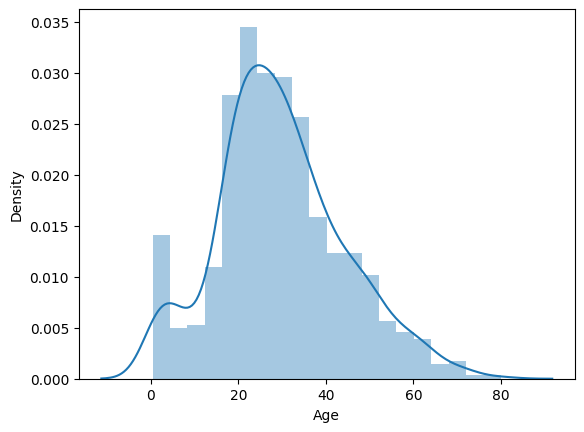

In [7]:
sns.distplot(df['Age'].dropna())

<ipython-input-8-48af3b413903>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'].fillna(100))


<Axes: xlabel='Age', ylabel='Density'>

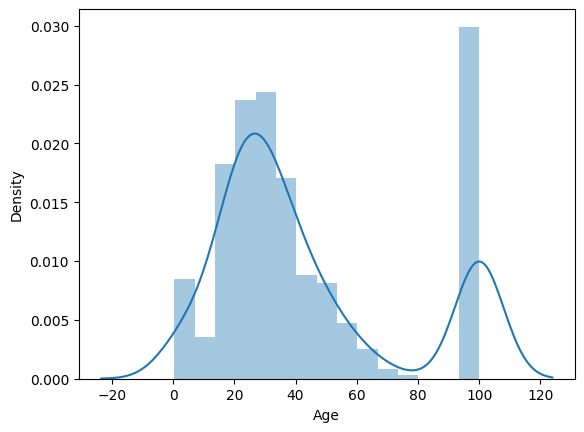

In [8]:
sns.distplot(df['Age'].fillna(100))

In [9]:
#### Gaussion Distribution

Text(0, 0.5, 'No of panssengers')

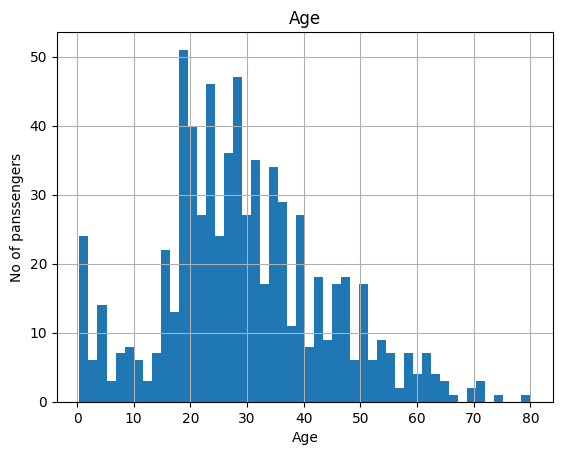

In [11]:
figure = df.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of panssengers')

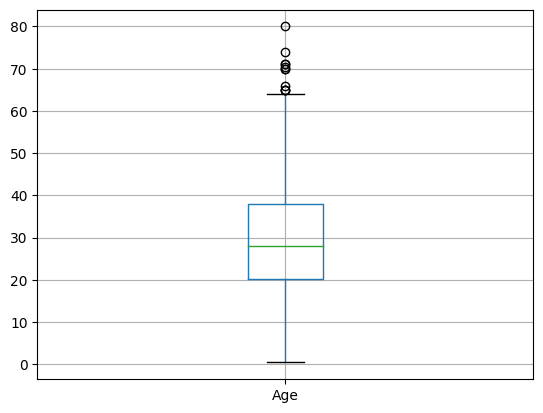

In [13]:
figure = df.boxplot(column='Age')

In [14]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [41]:
#### If the Data Is Normally Distributed we use this

In [18]:
#### Assuming Age follows a Guassian Distribution we will calculate boundaries which differentiates the outliers
df['Age'].mean()

29.69911764705882

In [19]:
upper_boundary = df['Age'].mean() + 3* df['Age'].std()
lower_boundary = df['Age'].mean() - 3* df['Age'].std()
print(upper_boundary),print(lower_boundary),print(df['Age'].mean())

73.27860964406094
-13.880374349943303
29.69911764705882


(None, None, None)

In [44]:
#### If the Data Are Skeweed We Use the below Technique

In [20]:
#### lets compute the Interquartile Range to calculate the boundaries
IQR = df.Age.quantile(0.75) - df.Age.quantile(0.25)

In [22]:
IQR

17.875

In [24]:
lower_whisker = df['Age'].quantile(0.25) - (IQR*1.5)
upper_whisker = df['Age'].quantile(0.75) + (IQR*1.5)
print(lower_whisker),print(upper_whisker)

-6.6875
64.8125


(None, None)

In [25]:
# Extreme outliers
lower_whisker = df['Age'].quantile(0.25) - (IQR*3)
upper_whisker = df['Age'].quantile(0.75) + (IQR*3)
print(lower_whisker),print(upper_whisker)

-33.5
91.625


(None, None)

Text(0, 0.5, 'No of panssengers')

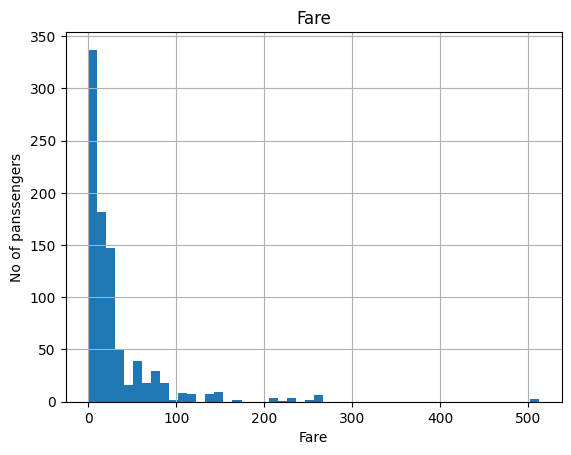

In [26]:
##  Feature is Skeweed
figure = df.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of panssengers')

<Axes: >

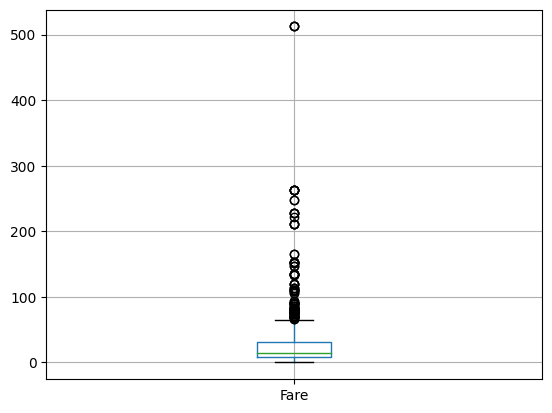

In [28]:
df.boxplot(column='Fare')

In [29]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [32]:
#### Lers compute the Interquartile Range to calcuate the boundaries
IQR = df.Fare.quantile(0.75) - df.Fare.quantile(0.25)

In [33]:
fare_lower_whisker = df['Fare'].quantile(0.25) - (IQR*1.5)
fare_upper_whisker = df['Fare'].quantile(0.75) + (IQR*1.5)
print(fare_lower_whisker),print(fare_upper_whisker)

-26.724
65.6344


(None, None)

In [34]:
## Extreme outliers
fare_lower_whisker = df['Fare'].quantile(0.25) - (IQR*3)
fare_upper_whisker = df['Fare'].quantile(0.75) + (IQR*3)
print(fare_lower_whisker),print(fare_upper_whisker)

-61.358399999999996
100.2688


(None, None)

In [35]:
data = df.copy()

In [36]:
data.loc[data['Age']>= 73,'Age'] = 73

In [37]:
data.loc[data['Fare']>=100,'Fare'] = 100

In [38]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Text(0, 0.5, 'No of passengers')

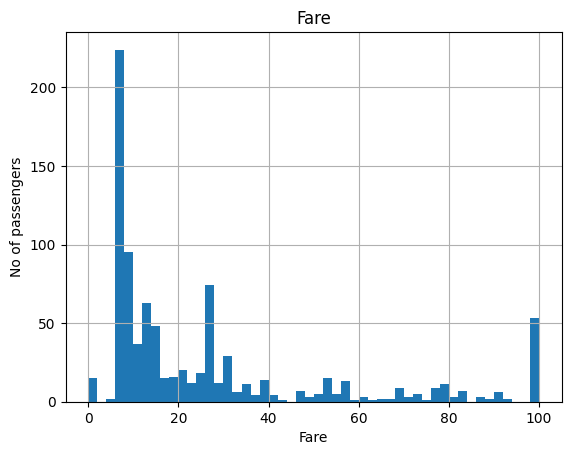

In [39]:
figure = data.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passengers')

Text(0, 0.5, 'No of passengers')

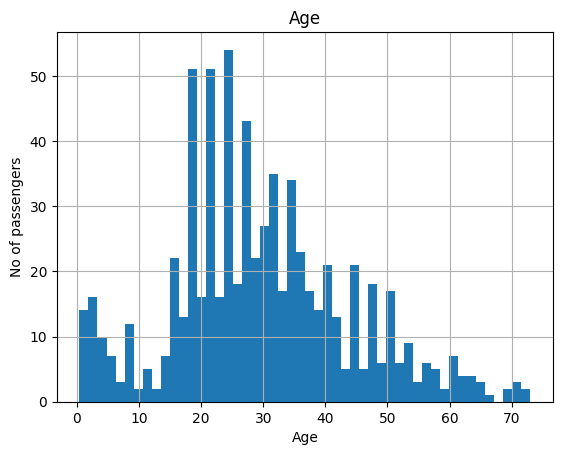

In [40]:
figure = data.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passengers')

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data[['Age','Fare']].fillna(0),data['Survived'],test_size=0.3)

In [54]:
# Logistic Regrission
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train,y_train)
y_pred = log.predict(x_test)
y_pred1 = log.predict_proba(x_test)
from sklearn.metrics import accuracy_score,roc_auc_score
print('Accuracy_Score: {}'.format(accuracy_score(y_test,y_pred)))
print('roc_auc_score: {}'.format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy_Score: 0.664179104477612
roc_auc_score: 0.71171875


In [58]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(x_train,y_train)
y_pred = RF.predict(x_test)
y_pred1 = RF.predict_proba(x_test)
from sklearn.metrics import accuracy_score,roc_auc_score
print('Accuracy_Score: {}'.format(accuracy_score(y_test,y_pred)))
print('roc_auc_score: {}'.format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy_Score: 0.7014925373134329
roc_auc_score: 0.7295717592592592
